In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv('digital_marketing_campaign_dataset.csv')

In [5]:
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


## Explorer les Données

#### commencons par quelques analyses descriptives pour comprendre la structure de nos données.

In [11]:
# Résumé statistique des données
data.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


## Observations Générales


### Taille de l'Échantillon:

##### Il y a 8000 enregistrements dans le jeu de données, ce qui est un bon nombre pour effectuer une analyse statistique significative.

### Âge:
##### Moyenne : 43,63 ans
##### Écart-Type : 14,90 ans
##### Minimum : 18 ans, Maximum : 69 ans
##### Cela indique que votre base de clients est assez diverse en termes d'âge, avec une majorité d'individus dans la quarantaine.

### Taux de Conversion:

##### Moyenne : 10,44%
##### Écart-Type : 5,49%
##### Un taux de conversion de 10% est souvent considéré comme un bon résultat dans le marketing digital.

### Visites du Site Web:

##### Moyenne : 24,75 visites
##### Écart-Type : 14,31 visites
##### Cela indique que certains clients visitent le site plusieurs fois avant de convertir.

### Temps Passé sur le Site:

##### Moyenne : 7,73 minutes
##### Cela indique que les visiteurs passent un temps raisonnable sur le site, ce qui est positif pour la conversion.

### Pages par Visite:

##### Moyenne : 5,55 pages
##### Cela peut donner un aperçu de l'engagement des utilisateurs pendant leur visite.

In [13]:
# Information sur le jeu de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [15]:
# Vérifier les valeurs manquantes
data.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

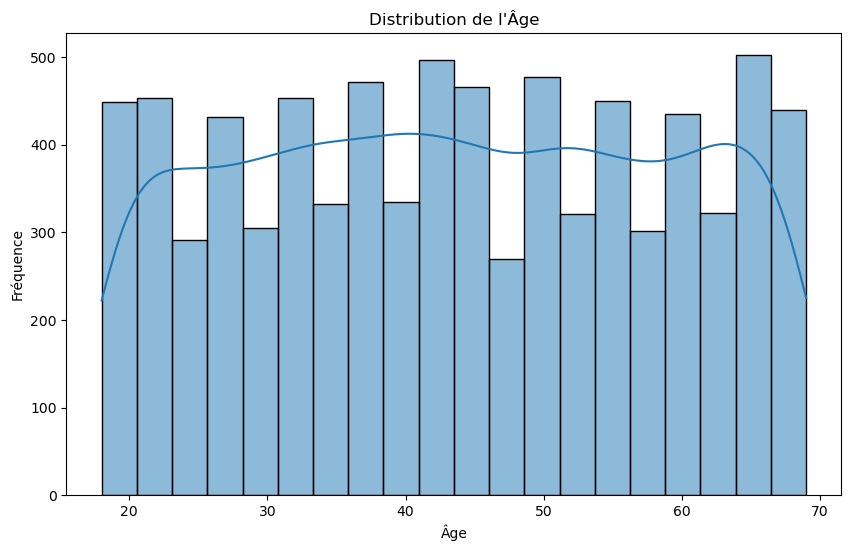

In [17]:
# Visualiser la distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution de l\'Âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

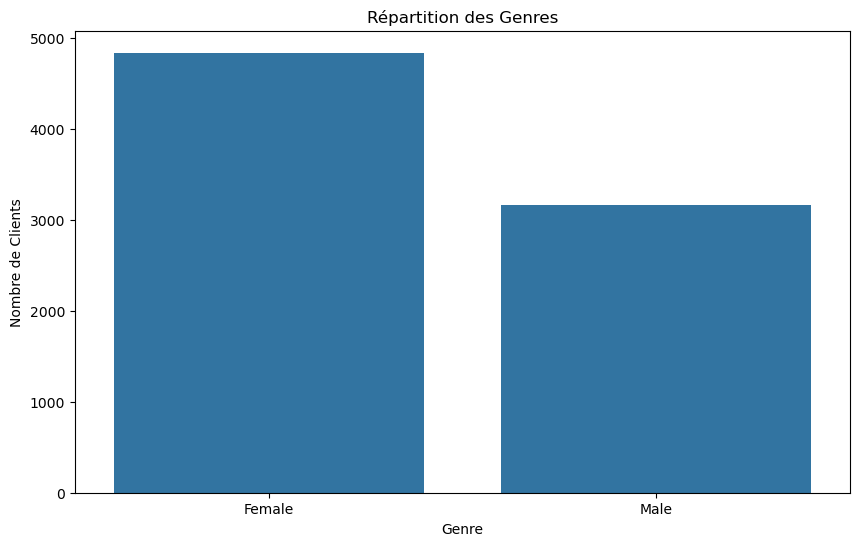

In [19]:
# Visualiser la répartition des genres
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data)
plt.title('Répartition des Genres')
plt.xlabel('Genre')
plt.ylabel('Nombre de Clients')
plt.show()


## Segmentation des Données
##### La segmentation des données nous permettre d’analyser les comportements des clients en fonction de différentes caractéristiques démographiques 
##### et de mieux comprendre comment chaque groupe interagit avec les campagnes. 
##### Voici comment procéder à cette analyse :

C:\Users\MOHAMED FAYE\AppData\Local\Temp\ipykernel_18364\1455120992.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate_age = data.groupby('Groupe_Age')['Conversion'].mean()


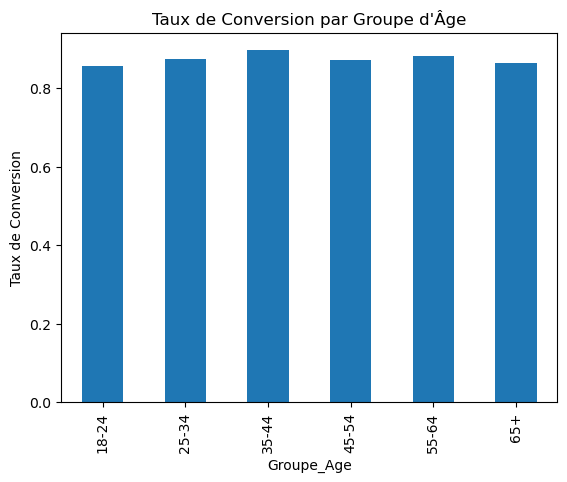

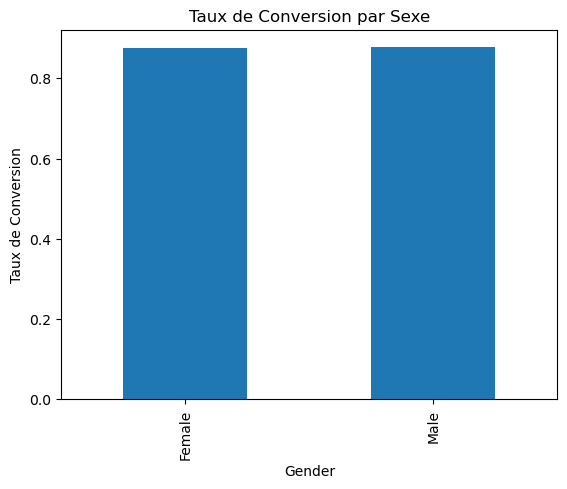

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('digital_marketing_campaign_dataset.csv')

# Créer des segments d'âge
data['Groupe_Age'] = pd.cut(data['Age'], bins=[18, 24, 34, 44, 54, 64, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

# Analyse du taux de conversion par groupe d'âge
conversion_rate_age = data.groupby('Groupe_Age')['Conversion'].mean()
conversion_rate_age.plot(kind='bar', title='Taux de Conversion par Groupe d\'Âge')
plt.ylabel('Taux de Conversion')
plt.show()

# Analyse par sexe
conversion_rate_Gender = data.groupby('Gender')['Conversion'].mean()
conversion_rate_Gender.plot(kind='bar', title='Taux de Conversion par Sexe')
plt.ylabel('Taux de Conversion')
plt.show()



CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object


C:\Users\MOHAMED FAYE\AppData\Local\Temp\ipykernel_18364\2889862092.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate_revenu = data.groupby('Income_Category')['Conversion'].mean()


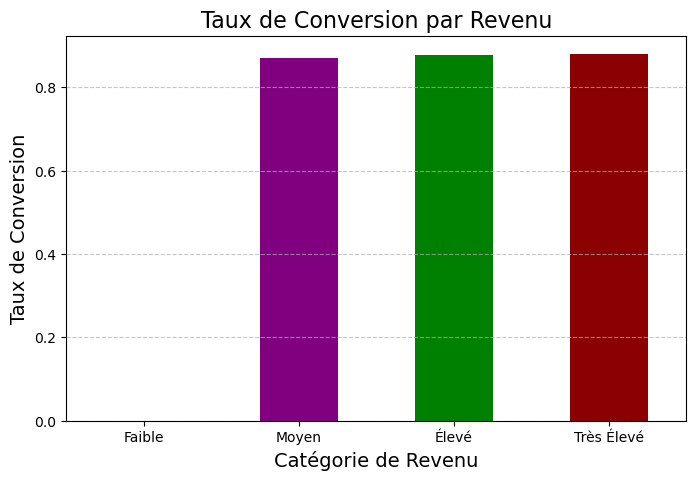

In [167]:
# Charger les données
data = pd.read_csv('digital_marketing_campaign_dataset.csv')

# Vérifiez les types de données dans le DataFrame
print(data.dtypes)

# Convertir la colonne 'Income' en type numérique, en remplaçant les erreurs par NaN
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')

# Supprimez les lignes avec des valeurs NaN dans 'Income' (si nécessaire)
data.dropna(subset=['Income'], inplace=True)

# Segmenter les revenus
data['Income_Category'] = pd.cut(data['Income'], bins=[0, 20000, 50000, 100000, 200000], 
                                  labels=['Faible', 'Moyen', 'Élevé', 'Très Élevé'])

# Calculer le taux de conversion moyen par catégorie de revenu
conversion_rate_revenu = data.groupby('Income_Category')['Conversion'].mean()

# Créer un graphique à barres avec des couleurs personnalisées
plt.figure(figsize=(8, 5))
colors = ['black', 'purple', 'green', 'darkred']  # Couleurs pour chaque barre
conversion_rate_revenu.plot(kind='bar', color=colors)  
plt.title('Taux de Conversion par Revenu', fontsize=16)
plt.ylabel('Taux de Conversion', fontsize=14)
plt.xlabel('Catégorie de Revenu', fontsize=14)
plt.xticks(rotation=0)  # Rotation des étiquettes de l'axe X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille pour la lisibilité
plt.show()

In [46]:
# Calculer la matrice de corrélation
correlation_matrix = data.corr()

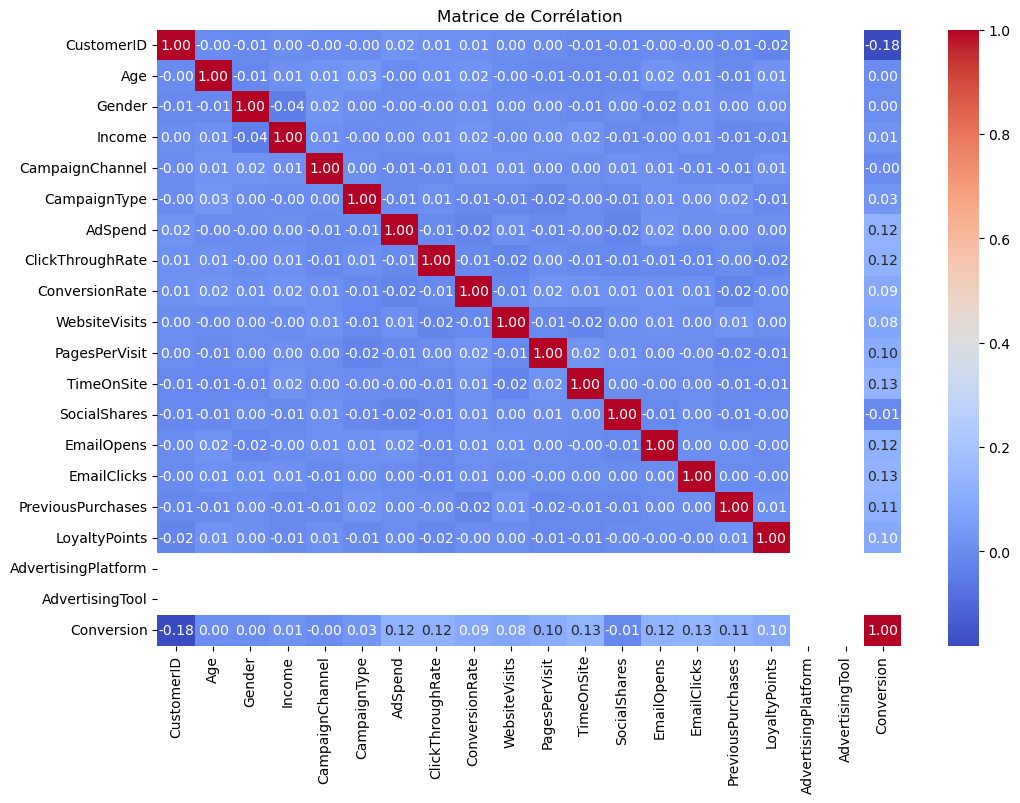

In [48]:
# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

In [58]:
# Charger le jeu de données
data = pd.read_csv('digital_marketing_campaign_dataset.csv')

# Sélection les variables indépendantes et dépendantes
X = data[['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'WebsiteVisits', 
           'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 
           'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']]
y = data['Conversion']  # Variable cible

In [62]:
 #Divison les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
#  Standardisation les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Modèle de Régression Logistique
print("### Modèle de Régression Logistique ###")
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

### Modèle de Régression Logistique ###


LogisticRegression()

In [68]:
# Prédictions
y_pred_logistic = logistic_model.predict(X_test)

In [70]:
# Évaluons le modèle de régression logistique
print("### Évaluation de la Régression Logistique ###")
print("Précision : ", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

### Évaluation de la Régression Logistique ###
Précision :  0.890625
              precision    recall  f1-score   support

           0       0.74      0.15      0.25       194
           1       0.89      0.99      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.82      0.57      0.59      1600
weighted avg       0.88      0.89      0.86      1600

[[  29  165]
 [  10 1396]]


## Points Positifs
### Précision Globale Élevée :

##### Le modèle a une précision de 89,06 %, ce qui signifie qu'il effectue généralement de bonnes prédictions.
### Excellente Performance sur les Conversions :

##### Le modèle prédit bien les conversions (classe 1) avec un rappel de 99 % et un F1-score de 94 %. Cela indique qu'il est très efficace pour identifier les clients qui vont convertir.
##### Limites Identifiées
### Mauvaise Performance sur les Non-Conversions :

##### Le rappel pour les non-conversions (classe 0) est très faible (15 %), ce qui signifie que le modèle ne parvient pas à identifier la plupart des clients qui ne convertiront pas. Cela peut être problématique, surtout si le coût de manquer une non-conversion est élevé.
### Déséquilibre des Classes :

##### Le jeu de données semble déséquilibré, avec beaucoup plus de conversions que de non-conversions. Cela peut fausser l'évaluation du modèle et conduire à des performances sous-optimales sur la classe minoritaire.

## plan d'action

##### Essayons d'exécuter le code avec l'encodage one-hot, puis appliquez SMOTE dans notre ensemble de données. 
##### Cela devrait résoudre l'erreur et nous permettrons de poursuivre notre analyse. 

In [77]:
from imblearn.over_sampling import SMOTE

# Identifiez les colonnes catégorielles
categorical_cols = data.select_dtypes(include=['object']).columns


# Appliquer l'encodage one-hot
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Séparer les caractéristiques et la cible
X = data_encoded.drop('Conversion', axis=1)
y = data_encoded['Conversion']

# Appliquer SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Vérifiez la nouvelle distribution
print("Distribution après SMOTE :")
print(y_resampled.value_counts())

Distribution après SMOTE :
Conversion
1    7012
0    7012
Name: count, dtype: int64


### Super !
##### Cela signifie que l'application de SMOTE a équilibré nos classes de conversion, en créant un nombre égal d'exemples pour les classes 0 (non-conversion) et 1 (conversion).
##### nous avons maintenant 7012 exemples pour chaque classe.

## Étapes Suivantes
### Entraînement du Modèle :
##### nous pouvons maintenant entraîner notre modèle de régression logistique (ou tout autre algorithme de machine learning) avec les données équilibrées.


In [89]:
# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Création du modèle de régression logistique
model = LogisticRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print("### Évaluation de la Régression Logistique ###")
print("Précision :", model.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

### Évaluation de la Régression Logistique ###
Précision : 0.7190730837789662
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1377
           1       0.73      0.71      0.72      1428

    accuracy                           0.72      2805
   macro avg       0.72      0.72      0.72      2805
weighted avg       0.72      0.72      0.72      2805

Matrice de confusion :
 [[1006  371]
 [ 417 1011]]


C:\Users\MOHAMED FAYE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## L'évaluation du modèle de régression logistique pour prédire le taux de conversion a produit des résultats prometteurs.


##### Le modèle a correctement identifié 1006 clients qui n'ont pas converti et 1011 clients qui ont converti, mais il a également fait des erreurs, en classant 371 non-conversions comme des conversions et 417 conversions comme non-conversions. 
##### Cela suggère qu'il existe des opportunités d'amélioration pour réduire ces faux positifs et négatifs.

#### Voici une synthèse de la performance de notre modèle :

### Précision Globale :
##### Le modèle a atteint une précision d'environ 72%. Cela indique qu'il est capable de prédire correctement si un client va convertir dans environ trois cas sur quatre.

## Mesures de Performance :

### Précision (Precision) : 
##### Le modèle a montré une précision légèrement supérieure pour la classe 1 (conversion), avec une précision d'environ 73%. Cela signifie que parmi les clients prédits comme ayant converti, environ 73% ont effectivement converti.
### Rappel (Recall) :
##### Les rappels pour les deux classes sont similaires, indiquant que le modèle a une capacité raisonnable à détecter à la fois les conversions et les non-conversions.
### F1-Score : 
##### Le F1-score, qui est la moyenne harmonique de la précision et du rappel, est d'environ 72%, ce qui reflète un bon équilibre entre les deux mesures.
### Matrice de Confusion :
##### Le modèle a correctement identifié 1006 clients qui n'ont pas converti et 1011 clients qui ont converti, mais il a également fait des erreurs, en classant 371 non-conversions comme des conversions et 417 conversions comme non-conversions. Cela suggère qu'il existe des opportunités d'amélioration pour réduire ces faux positifs et négatifs.


##### Cependant, le modèle a également montré des domaines à améliorer, notamment en réduisant le nombre de faux positifs et de faux négatifs identifiés dans la matrice de confusion. 
##### Nous prévoyons d'explorer des techniques supplémentaires et d'autres algorithmes de machine learning pour améliorer les performances de notre modèle.

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Définir les paramètres à tester
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Créer une instance de la régression logistique
log_reg = LogisticRegression()

# Appliquer GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs Hyperparamètres :", grid_search.best_params_)


C:\Users\MOHAMED FAYE\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MOHAMED FAYE\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MOHAMED FAYE\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MOHAMED FAYE\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MOHAMED FAYE\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MOHAMED FAYE\anaconda3\Lib\site-packages\sklearn\linear_model\_sag

Meilleurs Hyperparamètres : {'C': 0.1, 'solver': 'liblinear'}


In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Créer une instance du classificateur de forêts aléatoires
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1377
           1       0.97      0.92      0.94      1428

    accuracy                           0.94      2805
   macro avg       0.94      0.94      0.94      2805
weighted avg       0.94      0.94      0.94      2805



## Interprétation pour les non-techniciens :
#### Le modèle de Forêt Aléatoire a très bien réussi à prédire si un client va convertir ou non, avec une précision de 94%.
#### Cela signifie qu'il fait très peu d'erreurs et pourrait être très fiable pour prendre des décisions basées sur ces prédictions.
#### Le modèle a particulièrement bien identifié les clients qui ne convertissent pas (97% de précision pour cette catégorie), 
#### mais aussi une excellente performance pour ceux qui convertissent (92%).